In [1]:
import numpy as np
import pandas as pd
import umap
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

RANDOM_STATE = 123
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

model = RandomForestClassifier(random_state=RANDOM_STATE)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [3]:
?umap.UMAP

Init signature:
umap.UMAP(
    n_neighbors=15,
    n_components=2,
    metric='euclidean',
    metric_kwds=None,
    output_metric='euclidean',
    output_metric_kwds=None,
    n_epochs=None,
    learning_rate=1.0,
    init='spectral',
    min_dist=0.1,
    spread=1.0,
    low_memory=True,
    n_jobs=-1,
    set_op_mix_ratio=1.0,
    local_connectivity=1.0,
    repulsion_strength=1.0,
    negative_sample_rate=5,
    transform_queue_size=4.0,
    a=None,
    b=None,
    random_state=None,
    angular_rp_forest=False,
    target_n_neighbors=-1,
    target_metric='categorical',
    target_metric_kwds=None,
    target_weight=0.5,
    transform_seed=42,
    transform_mode='embedding',
    force_approximation_algorithm=False,
    verbose=False,
    tqdm_kwds=None,
    unique=False,
    densmap=False,
    dens_lambda=2.0,
    dens_frac=0.3,
    dens_var_shift=0.1,
    output_dens=False,
    disconnection_distance=None,
    precomputed_knn=(None, None, None),
)
Docstring:     
Uniform Manifold

In [6]:
# To see UMAP arguments in VSCode/Cursor, use help():
# To see full UMAP documentation, not truncated:
help(umap.UMAP)

Help on class UMAP in module umap.umap_:

class UMAP(sklearn.base.BaseEstimator)
 |  UMAP(
 |      n_neighbors=15,
 |      n_components=2,
 |      metric='euclidean',
 |      metric_kwds=None,
 |      output_metric='euclidean',
 |      output_metric_kwds=None,
 |      n_epochs=None,
 |      learning_rate=1.0,
 |      init='spectral',
 |      min_dist=0.1,
 |      spread=1.0,
 |      low_memory=True,
 |      n_jobs=-1,
 |      set_op_mix_ratio=1.0,
 |      local_connectivity=1.0,
 |      repulsion_strength=1.0,
 |      negative_sample_rate=5,
 |      transform_queue_size=4.0,
 |      a=None,
 |      b=None,
 |      random_state=None,
 |      angular_rp_forest=False,
 |      target_n_neighbors=-1,
 |      target_metric='categorical',
 |      target_metric_kwds=None,
 |      target_weight=0.5,
 |      transform_seed=42,
 |      transform_mode='embedding',
 |      force_approximation_algorithm=False,
 |      verbose=False,
 |      tqdm_kwds=None,
 |      unique=False,
 |      densmap=False

# What are the dimensions of the embedding object going to return

In [3]:
embedding = umap.UMAP(random_state=RANDOM_STATE)
embeddings = embedding.fit_transform(X_train, y_train)

/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


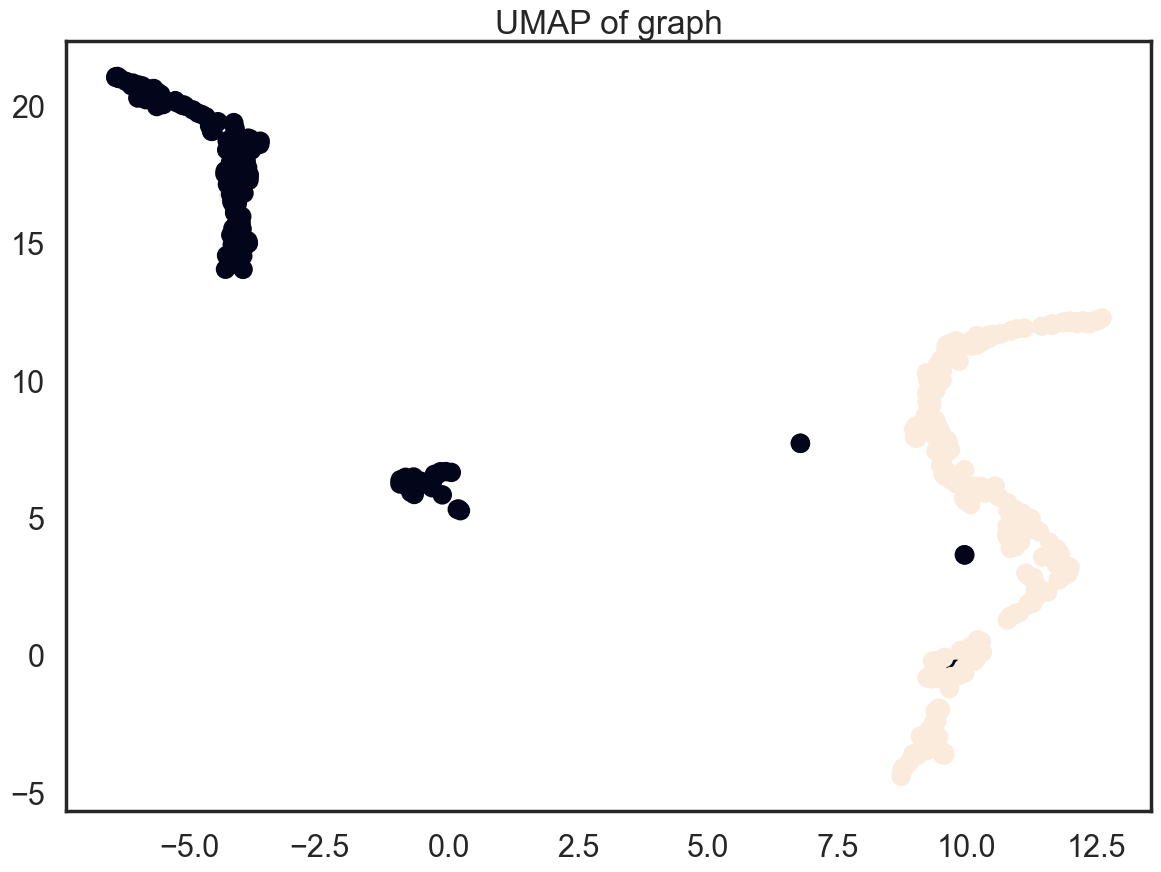

In [7]:
plt.scatter(embeddings[:,0], embeddings[:,1], c=y_train)
plt.title('UMAP of graph');

In [8]:
import mlflow
from tempfile import TemporaryDirectory
from mlflow.models import infer_signature

mlflow.set_tracking_uri("mlruns")
mlflow.set_experiment('breast_cancer')

mlflow.autolog(True, True, silent=True)

# Pull up UI

In [9]:

with mlflow.start_run():
    
    run = mlflow.active_run()
    
    mlflow.sklearn.log_model(model
                            , "model"
                            , input_example=X_train.head(10)
                            , signature=infer_signature(X_test, model.predict(X_test))
                            )
    

In [10]:
# Define a custom pyfunc model
class UMAPModel(mlflow.pyfunc.PythonModel):
    def load_context(self, context):
        # Load model for the embedding transformer
        with open(context.artifacts["model"], 'rb') as fin:
            self.model = pickle.load(fin)
    
    def predict(self, context, model_input):
        # Calculate embeddings
        return self.model.transform(model_input)

/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/mlflow/pyfunc/utils/data_validation.py:134: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


In [11]:
try:
    mlflow.end_run()
except:
    pass

try:
    mlflow.start_run(run.info.run_id)
except:
    pass

print(run.info.run_id)
print(run.info.run_name)

e947551dd54b456688ec922ddca46217
tasteful-mouse-241


In [42]:
?mlflow.pyfunc.log_model

Signature:
mlflow.pyfunc.log_model(
    artifact_path,
    loader_module=None,
    data_path=None,
    code_path=None,
    code_paths=None,
    infer_code_paths=False,
    conda_env=None,
    python_model=None,
    artifacts=None,
    registered_model_name=None,
    signature: mlflow.models.signature.ModelSignature = None,
    input_example: Union[pandas.core.frame.DataFrame, numpy.ndarray, dict, list, ForwardRef('csr_matrix'), ForwardRef('csc_matrix'), str, bytes, tuple] = None,
    await_registration_for=300,
    pip_requirements=None,
    extra_pip_requirements=None,
    metadata=None,
    model_config=None,
    example_no_conversion=None,
    streamable=None,
    resources: Union[str, List[mlflow.models.resources.Resource], NoneType] = None,
)
Docstring:
Log a Pyfunc model with custom inference logic and optional data dependencies as an MLflow
artifact for the current run.

For information about the workflows that this method supports, see :ref:`Workflows for
creating custom pyfunc

In [12]:
import pickle

import mlflow.models.signature

with TemporaryDirectory() as temp_dir:
    local_path = temp_dir + '/embedding.pkl'

    with open(local_path, 'wb') as fout:
        pickle.dump(embedding, fout)
        
    artifacts = {
        "model": local_path
    }

    response = mlflow.pyfunc.log_model(
        artifact_path = 'model/embedding'
        , python_model = UMAPModel()
        , artifacts = artifacts
        , input_example = X_test.fillna(0).sample(n=10, random_state=RANDOM_STATE)
        , signature = mlflow.models.signature.infer_signature(model_input=X_test, model_output=embedding.transform(X_test))
    )

/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025/02/27 17:12:45 INFO mlflow.pyfunc: Validating input example against model signature


/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [13]:
embedding_check = mlflow.pyfunc.load_model(f'runs:/{run.info.run_id}/model/embedding')
embedding_check.predict(X_test)

/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([[ 9.278807  ,  7.605242  ],
       [10.655862  , 11.824674  ],
       [-4.2840557 , 16.641048  ],
       [11.860503  ,  2.3248036 ],
       [-3.6155052 , 18.697464  ],
       [ 9.099917  , -3.4162552 ],
       [10.126447  ,  5.9146857 ],
       [10.165422  ,  5.1964235 ],
       [-3.8949738 , 13.953887  ],
       [ 9.586227  ,  6.219286  ],
       [ 9.895581  , -1.1460634 ],
       [-3.7342086 , 17.134714  ],
       [ 4.797411  ,  3.416066  ],
       [11.44507   ,  3.9761493 ],
       [ 8.962351  , -3.210259  ],
       [11.190507  ,  2.7180524 ],
       [11.816022  ,  2.8540308 ],
       [10.975797  ,  4.784602  ],
       [11.542658  ,  4.4747806 ],
       [10.786326  ,  3.9132473 ],
       [-5.4925947 , 20.556606  ],
       [-1.2034923 ,  6.6502366 ],
       [ 9.221944  , -1.5262994 ],
       [11.320436  , 11.959179  ],
       [ 9.230958  , -0.8488393 ],
       [-3.9518335 , 16.230648  ],
       [-4.025012  , 15.732852  ],
       [10.019566  ,  6.9788795 ],
       [-4.213465  ,

write a function that takes xyz, a dataframe (df), and returns the number of closest neighbors (n)

((x,y,z) df, n)

In [18]:
import numpy as np
from scipy.spatial.distance import cdist

points = np.random.rand(5, 2)

reference_point = np.array([[0.5, 0.5]])

distances = cdist(reference_point, points, 'euclidean')

n=2
nearest_neighbors_indices = np.argsort(distances[0])[:n]

nearest_neighbors = points[nearest_neighbors_indices]

print("points:", points)
print("Reference point:", reference_point)
print("Nearest neighbors:", nearest_neighbors)

points: [[0.57991609 0.34868537]
 [0.56838321 0.17793856]
 [0.51267349 0.43634934]
 [0.73163363 0.33701813]
 [0.48535515 0.51407311]]
Reference point: [[0.5 0.5]]
Nearest neighbors: [[0.48535515 0.51407311]
 [0.51267349 0.43634934]]


In [19]:
def find_nearest_neighbors(reference_point, df, n=5):
    """
    Find the n nearest neighbors to a reference point in a dataframe.
    
    Parameters:
    -----------
    reference_point : tuple or list or array
        The reference point coordinates (x, y) or (x, y, z)
    df : pandas.DataFrame
        DataFrame containing the points to search through.
        Should have columns matching the dimensions of reference_point.
    n : int, default=5
        Number of nearest neighbors to return
    
    Returns:
    --------
    pandas.DataFrame
        A dataframe containing the n nearest neighbors, sorted by distance
    """
    # Convert reference point to numpy array with shape (1, dimensions)
    ref_point = np.array([reference_point])
    
    # Calculate distances from reference point to all points in the dataframe
    distances = cdist(ref_point, df.values, 'euclidean')
    
    # Get indices of n nearest neighbors
    nearest_indices = np.argsort(distances[0])[:n]
    
    # Return the nearest neighbors as a dataframe
    nearest_neighbors_df = df.iloc[nearest_indices].copy()
    
    # Add distance as a column
    nearest_neighbors_df['distance'] = distances[0][nearest_indices]
    
    # Sort by distance
    return nearest_neighbors_df.sort_values('distance')


In [20]:
# Test the find_nearest_neighbors function
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd

# Create a sample dataframe with 2D points
sample_data = {
    'x': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
    'y': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
}
sample_df = pd.DataFrame(sample_data)

# Define a reference point
ref_point = (3.5, 4.0)

# Find the 3 nearest neighbors
nearest_neighbors = find_nearest_neighbors(ref_point, sample_df, n=3)

# Display the results
print("Sample DataFrame:")
print(sample_df)
print("\nReference Point:", ref_point)
print("\nNearest Neighbors:")
print(nearest_neighbors)

# Verify the results manually
print("\nVerification:")
ref_point_array = np.array([ref_point])
distances = cdist(ref_point_array, sample_df.values, 'euclidean')[0]
print("Calculated distances:", distances)
print("Sorted indices:", np.argsort(distances)[:3])


Sample DataFrame:
      x     y
0   1.0   1.5
1   2.0   2.5
2   3.0   3.5
3   4.0   4.5
4   5.0   5.5
5   6.0   6.5
6   7.0   7.5
7   8.0   8.5
8   9.0   9.5
9  10.0  10.5

Reference Point: (3.5, 4.0)

Nearest Neighbors:
     x    y  distance
2  3.0  3.5  0.707107
3  4.0  4.5  0.707107
1  2.0  2.5  2.121320

Verification:
Calculated distances: [3.53553391 2.12132034 0.70710678 0.70710678 2.12132034 3.53553391
 4.94974747 6.36396103 7.77817459 9.19238816]
Sorted indices: [2 3 1]
